In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Accuracy data by method
accuracy_data = {
    'Method': [
        'Prolog', 'Prolog-small', 'Prolog-no-FS', 'Prolog-fix',
        'Prolog-backup', 'Prolog-retry',  'CoT', 'CoT-GRPO', 'Direct', 'Random'
    ],
    'Overall Accuracy (%)': [
        35.33, 12.33, 16.67, 39.00, 40.67, 48.67, 50.33, 56.67, 42.33, 20.67
    ],
    'Valid-Only Accuracy (%)': [
       53.27, 27.41, 66.67, 51.09, 40.94, 51.77, 51.71, 57.43, 42.33, 20.67
    ]
}
df_accuracy = pd.DataFrame(accuracy_data)


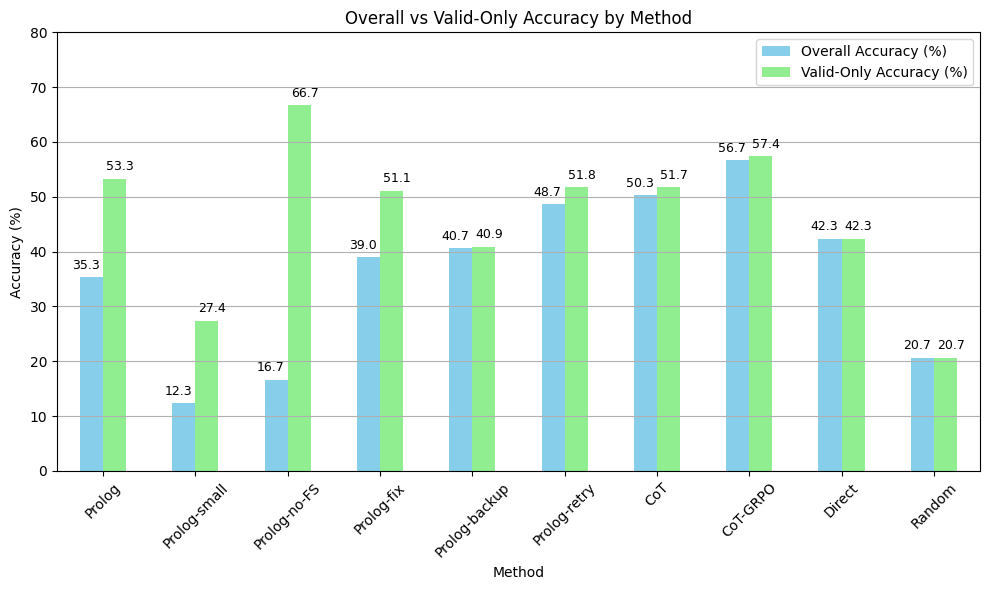

In [ ]:
import matplotlib.pyplot as plt

# Barplot
plt.figure(figsize=(10, 6))
ax = df_accuracy.plot(
    x='Method',
    kind='bar',
    stacked=False,
    color=['skyblue', 'lightgreen'],
    ax=plt.gca()
)
plt.title("Overall vs Valid-Only Accuracy by Method")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.ylim(0, 80)
plt.grid(axis='y')

group_spacing = 0.06 

for i, container in enumerate(ax.containers):
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2 + (-group_spacing if i == 0 else group_spacing),
            height + 1,
            f'{height:.1f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.tight_layout()
plt.show()


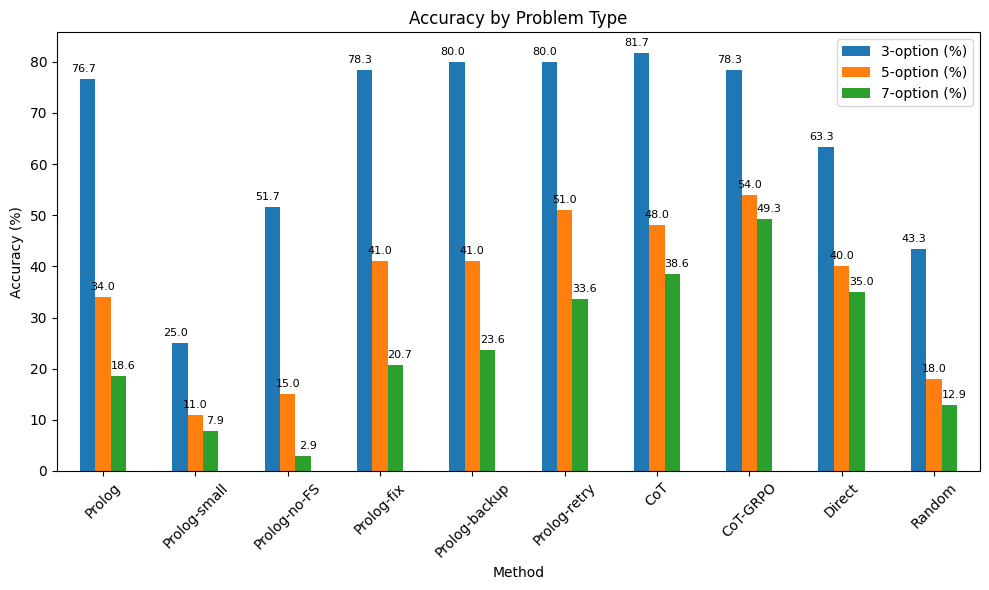

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

problem_type_data = {
    'Method': [
        'Prolog', 'Prolog-small', 'Prolog-no-FS', 'Prolog-fix',
        'Prolog-backup', 'Prolog-retry',  'CoT', 'CoT-GRPO', 'Direct', 'Random'
    ],
    '3-option (%)': [76.67, 25.00, 51.67, 78.33, 80.00, 80.00, 81.67, 78.33, 63.33, 43.33],
    '5-option (%)': [34.00, 11.00, 15.00, 41.00, 41.00, 51.00, 48.00, 54.00, 40.00, 18.00],
    '7-option (%)': [18.57, 7.86, 2.86, 20.71, 23.57, 33.57, 38.57, 49.29, 35.00, 12.86],
}
df_problem_type = pd.DataFrame(problem_type_data)

ax = df_problem_type.set_index('Method').plot(kind='bar', figsize=(10, 6))
plt.title("Accuracy by Problem Type")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.grid(False)

bar_width = ax.containers[0][0].get_width()
n_bars = len(ax.containers)

offsets = [-0.05, 0.0, 0.05]  # Spread labels slightly to avoid overlap

for i, container in enumerate(ax.containers):
    for bar in container:
        height = bar.get_height()
        x = bar.get_x() + bar_width / 2 + offsets[i] 
        ax.text(
            x,
            height + 1,
            f'{height:.1f}',
            ha='center',
            va='bottom',
            fontsize=8
        )

plt.tight_layout()
plt.show()


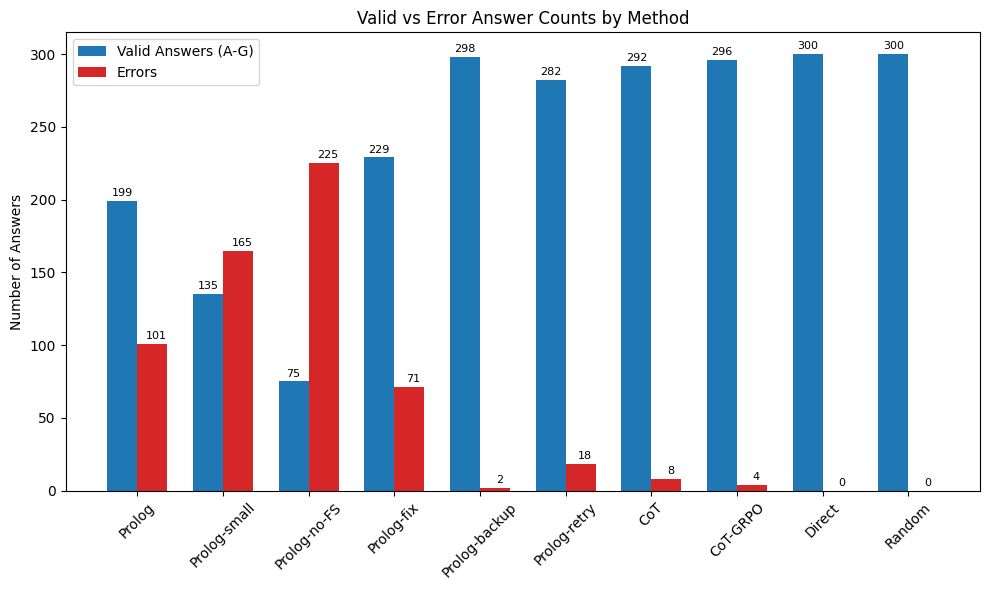

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example parsed data
method_to_answer_distribution = {
    'Prolog': {'Error (invalid answer)': 62, 'A': 56, 'B': 41, 'Prolog Error': 39, 'C': 38, 'D': 28, 'E': 20, 'G': 10, 'F': 6},
    'Prolog-small': {'Error (invalid answer)': 118, 'A': 95, 'Prolog Error': 47, 'B': 14, 'D': 8, 'C': 6, 'G': 6, 'E': 5, 'F': 1},
    'Prolog-no-FS': {'Error (invalid answer)': 167, 'Prolog Error': 56, 'A': 28, 'B': 23, 'C': 16, 'E': 4, 'D': 3, 'Error processing sample': 2, 'F': 1},
    'Prolog-fix': {'A': 65, 'Error (invalid answer)': 56, 'B': 46, 'C': 43, 'D': 30, 'E': 25, 'G': 10, 'F': 10, 'Prolog Error': 9, 'Error processing sample': 4, '_4946': 1, 'MINIVAN': 1},
    'Prolog-backup': {'C': 140, 'A': 55, 'B': 41, 'D': 27, 'E': 19, 'G': 10, 'F': 6, 'Error processing sample': 2},
    'Prolog-retry': {'A': 79, 'B': 59, 'C': 49, 'D': 38, 'E': 25, 'G': 18, 'F': 14, 'Error (invalid answer)': 10, 'Prolog Error': 7, 'Error processing sample': 1},
    'CoT': {'B': 64, 'C': 61, 'A': 60, 'E': 34, 'D': 30, 'G': 24, 'F': 19, 'No answer extracted from output': 8},
    'CoT-GRPO': {'B': 67, 'A': 55, 'C': 52, 'D': 43, 'E': 36, 'G': 24, 'F': 19, 'No answer extracted from output': 4},
    'Direct': {'C': 78, 'D': 47, 'B': 47, 'A': 44, 'E': 40, 'G': 28, 'F': 16},
    'Random':  {'C': 65, 'A': 60, 'B': 56, 'E': 42, 'D': 38, 'G': 21, 'F': 18}
}

valid_choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
error_labels = ['Error (invalid answer)', 'Prolog Error', 'Error processing sample', 'No answer extracted from output', '_4946', 'MINIVAN']

methods = list(method_to_answer_distribution.keys())
valid_totals = []
error_totals = []

for method in methods:
    counts = method_to_answer_distribution[method]
    valid_total = sum(counts.get(k, 0) for k in valid_choices)
    error_total = sum(counts.get(k, 0) for k in error_labels)
    valid_totals.append(valid_total)
    error_totals.append(error_total)

x = np.arange(len(methods))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, valid_totals, width, label='Valid Answers (A-G)', color='tab:blue')
bars2 = ax.bar(x + width/2, error_totals, width, label='Errors', color='tab:red')

for bar in bars1:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 2,
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=8
    )

for bar in bars2:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2 + 0.05,
        height + 2,
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=8
    )

ax.set_ylabel('Number of Answers')
ax.set_title('Valid vs Error Answer Counts by Method')
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=45)
ax.legend()
ax.grid(False)  # Remove grid lines

plt.tight_layout()
plt.show()


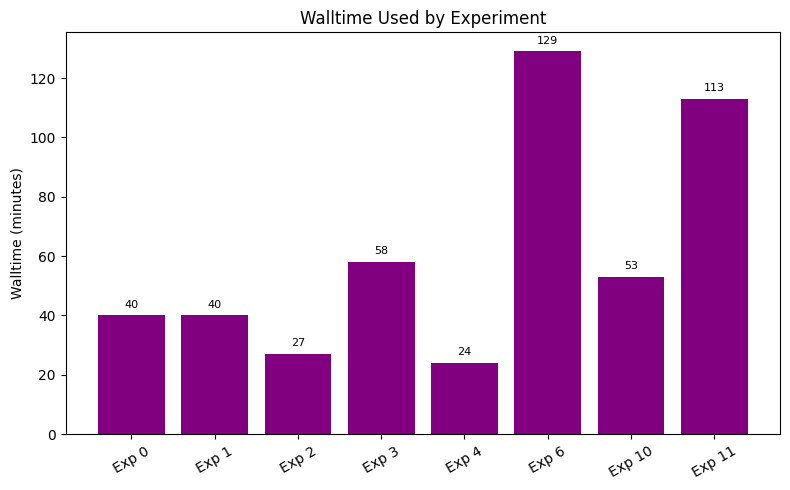

In [ ]:

walltimes = {
    'Exp 0': '00:40:41',
    'Exp 1': '00:40:28',
    'Exp 2': '00:27:23',
    'Exp 3': '00:58:31',
    'Exp 4': '00:24:46',
    'Exp 6': '02:09:44',
    'Exp 10': '00:53:38',
    'Exp 11': '01:53:13'
}

# Convert to minutes
walltimes_min = {k: int(v.split(':')[0]) * 60 + int(v.split(':')[1]) for k, v in walltimes.items()}

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(walltimes_min.keys(), walltimes_min.values(), color='purple')

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 2,
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=8
    )

ax.set_ylabel('Walltime (minutes)')
ax.set_title('Walltime Used by Experiment')
plt.xticks(rotation=30)
ax.grid(False)  # No background lines
plt.tight_layout()
plt.show()


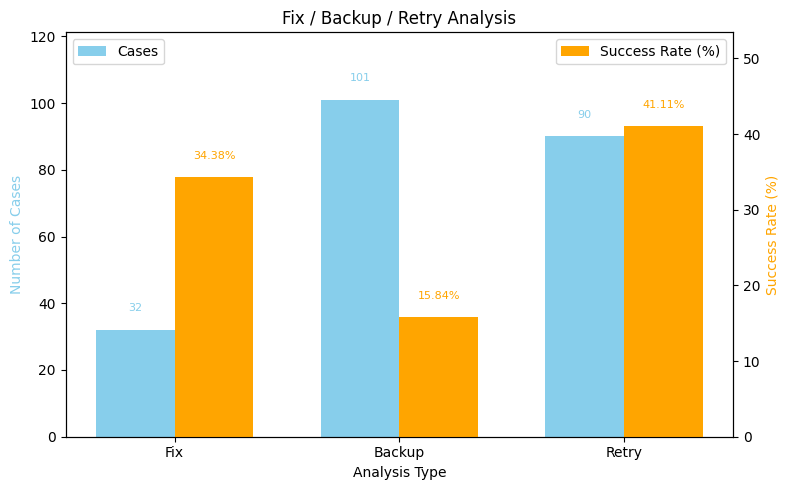

In [ ]:
import matplotlib.pyplot as plt

categories = ['Fix', 'Backup', 'Retry']
case_counts = [32, 101, 90]
success_rates = [34.38, 15.84, 41.11]

fig, ax1 = plt.subplots(figsize=(8, 5))

bar_width = 0.35
x = range(len(categories))

bars1 = ax1.bar(x, case_counts, bar_width, label='Cases', color='skyblue')
ax2 = ax1.twinx()
bars2 = ax2.bar([i + bar_width for i in x], success_rates, bar_width, label='Success Rate (%)', color='orange')

ax1.set_xlabel('Analysis Type')
ax1.set_ylabel('Number of Cases', color='skyblue')
ax2.set_ylabel('Success Rate (%)', color='orange')
plt.title('Fix / Backup / Retry Analysis')

plt.xticks([i + bar_width / 2 for i in x], categories)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_ylim(0, max(case_counts) * 1.2)
ax2.set_ylim(0, max(success_rates) * 1.3)

for bar in bars1:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(case_counts) * 0.05,  # offset relative to max height
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=8,
        color='skyblue'
    )

for bar in bars2:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(success_rates) * 0.05,
        f'{height:.2f}%',
        ha='center',
        va='bottom',
        fontsize=8,
        color='orange'
    )

plt.tight_layout()
plt.show()


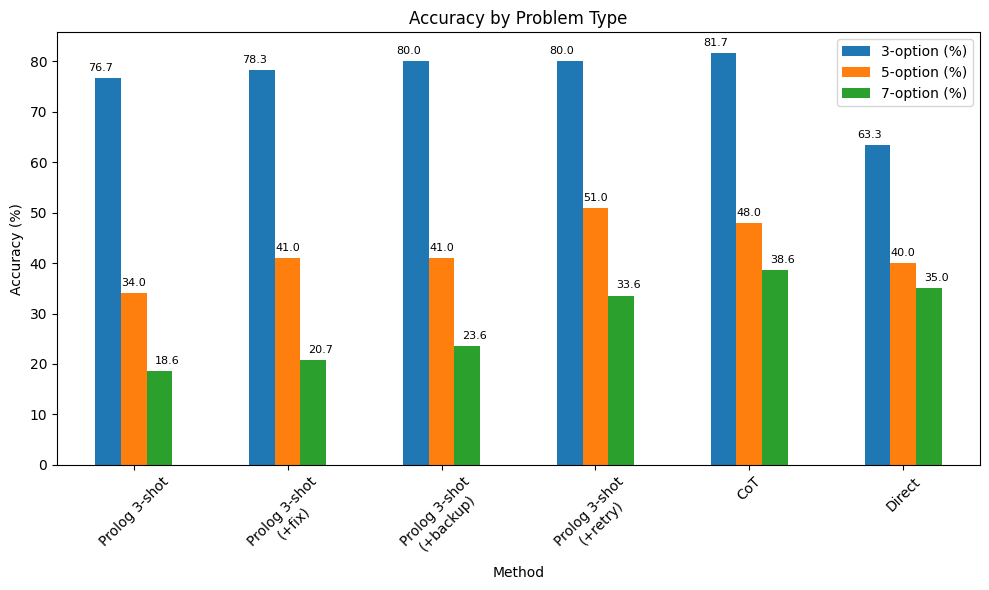

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

problem_type_data = {
    'Method': [
        'Prolog 3-shot', 'Prolog 3-shot\n(+fix)',
        'Prolog 3-shot\n(+backup)', 'Prolog 3-shot\n(+retry)',  'CoT', 'Direct'
    ],
    '3-option (%)': [76.67, 78.33, 80.00, 80.00, 81.67, 63.33],
    '5-option (%)': [34.00, 41.00, 41.00, 51.00, 48.00, 40.00],
    '7-option (%)': [18.57, 20.71, 23.57, 33.57, 38.57, 35.00],
}
df_problem_type = pd.DataFrame(problem_type_data)

ax = df_problem_type.set_index('Method').plot(kind='bar', figsize=(10, 6))
plt.title("Accuracy by Problem Type")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.grid(False)

bar_width = ax.containers[0][0].get_width()
n_bars = len(ax.containers)

offsets = [-0.05, 0.0, 0.05]  # Spread labels slightly to avoid overlap

for i, container in enumerate(ax.containers):
    for bar in container:
        height = bar.get_height()
        x = bar.get_x() + bar_width / 2 + offsets[i]  # Slight horizontal shift
        ax.text(
            x,
            height + 1,
            f'{height:.1f}',
            ha='center',
            va='bottom',
            fontsize=8
        )

plt.tight_layout()
plt.show()


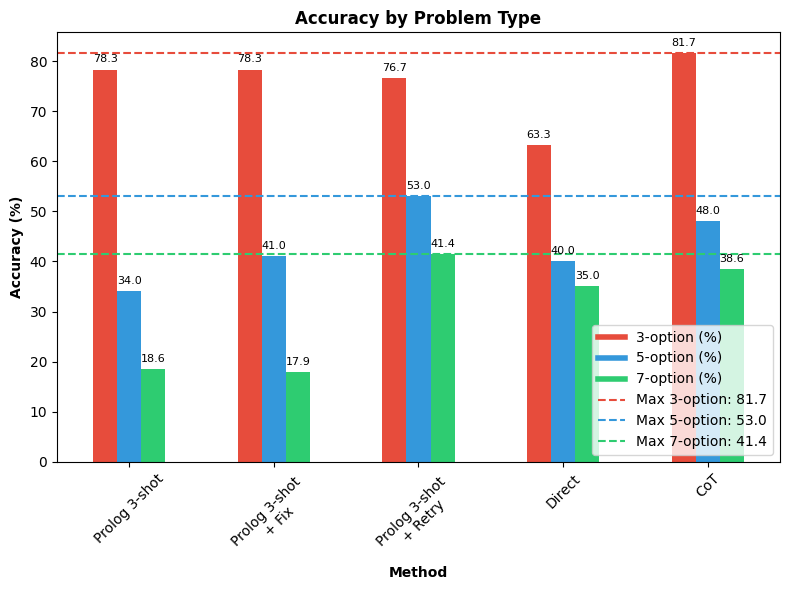

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

problem_type_data = {
    'Method': [
        'Prolog 3-shot', 'Prolog 3-shot \n+ Fix', 'Prolog 3-shot \n+ Retry', 'Direct', 'CoT'
    ],
    '3-option (%)': [78.33, 78.33, 76.67, 63.33, 81.67],
    '5-option (%)': [34.00, 41.00, 53.00, 40.00, 48.00], 
    '7-option (%)': [18.57, 17.86, 41.43, 35.00, 38.57],
}
df_problem_type = pd.DataFrame(problem_type_data)


custom_colors = ['#e74c3c', '#3498db', '#2ecc71']


fig, ax = plt.subplots(figsize=(8, 6))
df_problem_type.set_index('Method').plot(kind='bar', ax=ax, color=custom_colors)
plt.title("Accuracy by Problem Type", fontweight='bold')
plt.xlabel("Method", fontweight='bold')
plt.ylabel("Accuracy (%)", fontweight='bold')
plt.xticks(rotation=45)
plt.grid(False)


max_3_option = df_problem_type['3-option (%)'].max()
max_5_option = df_problem_type['5-option (%)'].max()
max_7_option = df_problem_type['7-option (%)'].max()

ax.axhline(y=max_3_option, color='#e74c3c', linestyle='--', linewidth=1.5)
ax.axhline(y=max_5_option, color='#3498db', linestyle='--', linewidth=1.5)
ax.axhline(y=max_7_option, color='#2ecc71', linestyle='--', linewidth=1.5)


bar_width = ax.containers[0][0].get_width()
n_bars = len(ax.containers)

for i, container in enumerate(ax.containers):
    for bar in container:
        height = bar.get_height()
        x = bar.get_x() + bar_width / 2
        ax.text(
            x,
            height + 1,
            f'{height:.1f}',
            ha='center',
            va='bottom',
            fontsize=8
        )


legend_elements = [
    Line2D([0], [0], color='#e74c3c', lw=4, label='3-option (%)'),
    Line2D([0], [0], color='#3498db', lw=4, label='5-option (%)'),
    Line2D([0], [0], color='#2ecc71', lw=4, label='7-option (%)'),
    Line2D([0], [0], color='#e74c3c', linestyle='--', lw=1.5, label='Max 3-option: 81.7'),
    Line2D([0], [0], color='#3498db', linestyle='--', lw=1.5, label='Max 5-option: 53.0'),
    Line2D([0], [0], color='#2ecc71', linestyle='--', lw=1.5, label='Max 7-option: 41.4'),
]


ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig('accuracy_by_problem_type.png')